In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

                              attackkey  overlap  total_received       tp  \
0      00631e77cb5c08e9d5e7673a73bcd887        0         1582358  1582358   
133    7f2b2ef41a396bbd0269a4801fd84274        0         1582358  1582358   
134    7ff63ada8c94b8d6064aa26f7e9efbac        0         1582358  1582358   
138    85e194d3ed23183769ed40aa93b26038        0         1582358  1582358   
140    86bf22271e530d57313cc3c4d2e73c9d        0         1582358  1582358   
143    8e4c9e0a6e37b2eb954a868db67b6b4d        0         1582358  1582358   
144    9138ab0055963f033fd015cea2ef1bc6        0         1582358  1582358   
147    95120088fead57b6620bba06ee0ba5ca        0         1582358  1582358   
148    967a3709db351926be99ddc0f7d4697a        0         1582358  1582358   
131    7cb73e12f758f85209f233de87c57e5e        0         1582358  1582358   
150    97ae14212b7569d75cc1f350bd479cf8        0         1582358  1582358   
155    9ae4af2b74c64e5243e5ef791c9894ff        0         1582358  1582358   

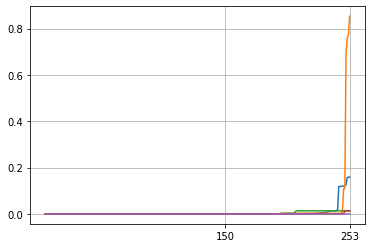

In [3]:
#     reader = csv.reader(f)
#     results = list(reader)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

results = pd.read_csv('results_udp_AMI.csv')
results = results.sort_values('fp')
results2 = pd.read_csv('results_udp_portandAMI.csv')
results2 = results2.sort_values('fp')
results3 = pd.read_csv('results_udp_leastvalues.csv')
results3 = results3.sort_values('fp')
results4 = pd.read_csv('results_udp_lvplusami.csv')
results4 = results4.sort_values('fp')

print(results)
print(results2)

x = range(1,254)
y = list(results['fp']/1582358)
yy = list(results2['fp']/1582358)
yyy = list(results3['fp']/1582358)
yyyy = list(results4['fp']/1582358)
yyyyy = np.zeros(253)

# my_xticks = [0, 25, 50, 75,100]
plt.xticks([150,253])
# plt.yticks([-0.01])
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
plt.plot(x, y)
plt.plot(x, yy)
plt.plot(x, yyy)
plt.plot(x, yyyy)
plt.plot(x, yyyyy)
# plt.plot(x, y3)
plt.grid(axis='y', linestyle='-')
plt.grid(axis='x', linestyle='-')
plt.show()



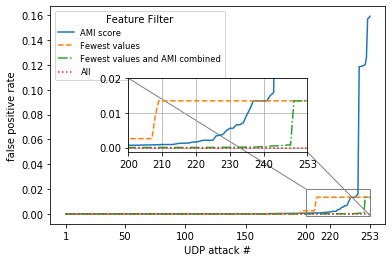

In [5]:
fig, ax = plt.subplots() # create a new figure with a default 111 subplot
ax.plot(x, y, label='AMI score', linestyle='-')
ax.plot(x, yyy, label='Fewest values', linestyle='--')
ax.plot(x, yyyy, label='Fewest values and AMI combined', linestyle='-.')
ax.plot(x, yyyyy, label='All', linestyle=':')
# ax.plot(x, yy, label='Source port')
# ax.grid(axis='y', linestyle='-')
# ax.grid(axis='x', linestyle='-')
plt.xlabel('UDP attack #')
plt.ylabel('false positive rate')
plt.xticks([1,50,100,150,200,220,253])

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

# legend([plot1], "title", prop=fontP) 
plt.legend(loc=2, prop=fontP, handlelength=1.9, title="Feature Filter")

axins = zoomed_inset_axes(ax, 2.8, loc=10)
axins.plot(x, y,  linestyle='-')
# axins.plot(x, yy)
axins.plot(x, yyy, linestyle='--')
axins.plot(x, yyyy, linestyle='-.')
axins.plot(x, yyyyy, linestyle=':')
plt.xticks([200,210,220,230,240,253])

axins.grid(axis='y', linestyle='-')
axins.grid(axis='x', linestyle='-')

x1, x2, y1, y2 = 200, 253, -0.0013, 0.02 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.show()
# plt.savefig('masterthesis/AMI.eps', format='eps')

0.013440700524154458
0.013440700524154458


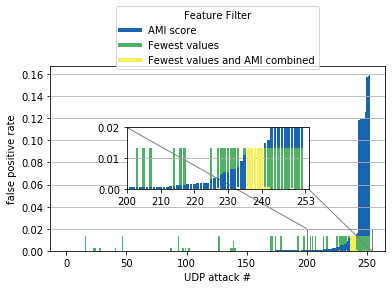

In [7]:
#     reader = csv.reader(f)
#     results = list(reader)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

results = pd.read_csv('results_udp_AMI.csv')
results = results.sort_values('fp')
results3 = pd.read_csv('results_udp_leastvalues.csv')
# results3 = results3.sort_values('fp')
results4 = pd.read_csv('results_udp_lvplusami.csv')
# results4 = results4.sort_values('fp')


data = pd.concat([results['fp'],results3['fp'],results4['fp']],axis=1,keys=['r1', 'r2', 'r3'])

data = data.sort_values('r1')

x = range(1,254)
y = list(data['r1']/1582358)
yyy = list(data['r2']/1582358)
yyyy = list(data['r3']/1582358)


fig = plt.figure()
ax = fig.add_subplot(111)

bar_width = 1
arr = []
for i in range(len(y)):
    if y[i] > yyy[i]:
        arr.append(i)
    if i > 235:
        ax.bar(i, y[i], color='#1965B0',width=bar_width,zorder=0)
        ax.bar(i , yyy[i], color='#4EB265',width=bar_width,zorder=1)
        ax.bar(i , yyyy[i], color='#F7F056',width=bar_width,zorder=3)
    else:
        ax.bar(i, y[i], color='#1965B0',width=bar_width,zorder=2)
        ax.bar(i , yyy[i], color='#4EB265',width=bar_width,zorder=1)
        ax.bar(i , yyyy[i], color='#F7F056',width=bar_width,zorder=3)

print(y[240])
print(yyy[240])
    
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#1965B0', lw=4),
                Line2D([0], [0], color='#4EB265', lw=4),
                Line2D([0], [0], color='#F7F056', lw=4)]


box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
ax.set_position([box.x0, box.y0, box.width, box.height - box.height * 0.15])

# Put a legend to the right of the current axis
ax.legend(custom_lines, ['AMI score', 'Fewest values', 'Fewest values and AMI combined'],title="Feature Filter",loc='upper center', bbox_to_anchor=(0.5, 1.35))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.grid(axis='y', linestyle='-')
# plt.grid(axis='x', linestyle='-')

axins = zoomed_inset_axes(ax, 2.8, loc=10)

for i in range(len(y)):
    if i in arr:
        axins.bar(i, y[i], color='#1965B0',zorder=0)
            # axins.plot(x, yy)
        axins.bar(i, yyy[i], color='#4EB265',zorder=1)
        axins.bar(i, yyyy[i] ,color='#F7F056',zorder=3)
    else:
        axins.bar(i, y[i], color='#1965B0',zorder=2)
        # axins.plot(x, yy)
        axins.bar(i, yyy[i], color='#4EB265',zorder=1)
        axins.bar(i, yyyy[i] ,color='#F7F056',zorder=3)
plt.xticks([200,210,220,230,240,253])

axins.grid(axis='y', linestyle='-')

x1, x2, y1, y2 = 200, 254, 0, 0.02 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

ax.set_xlabel('UDP attack #')
ax.set_ylabel('false positive rate')
plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


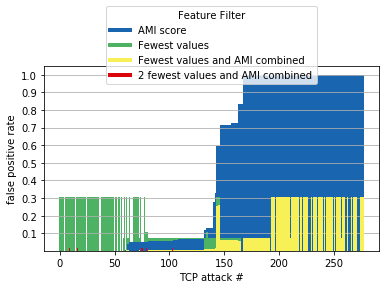

In [9]:
#     reader = csv.reader(f)
#     results = list(reader)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
results = pd.read_csv('results_tcp_AMI.csv')
# results = results.sort_values('fp')

results2 = pd.read_csv('results_tcp_leastvalues.csv')
# results2 = results2.sort_values('fp')

results3 = pd.read_csv('results_tcp_lvplusami.csv')
# results3 = results3.sort_values('fp')

results4 = pd.read_csv('results.csv')
# results4 = results4.sort_values('fp')


data = pd.concat([results['fp'],results2['fp'],results3['fp'],results4['fp']],axis=1,keys=['r1', 'r2', 'r3','r4'])

data = data.sort_values('r1')

x = range(1,254)
y = list(data['r1']/1582358)
yy = list(data['r2']/1582358)
yyy = list(data['r3']/1582358)
yyyy = list(data['r4']/1582358)


fig = plt.figure()
ax = fig.add_subplot(111)

bar_width = 1

for i in range(len(y)):
    if i > 131:
        ax.bar(i, y[i], color='#1965B0',width=bar_width,zorder=0)
        ax.bar(i , yy[i], color='#4EB265',width=bar_width,zorder=1)
        ax.bar(i , yyy[i], color='#F7F056',width=bar_width,zorder=2)
        ax.bar(i , yyyy[i], color='#DC050C',width=bar_width,zorder=4)
    elif i in [60,65,66,75,76]:
        ax.bar(i, y[i], color='#1965B0',width=bar_width,zorder=0)
        ax.bar(i , yy[i], color='#4EB265',width=bar_width,zorder=1)
        ax.bar(i , yyy[i], color='#F7F056',width=bar_width,zorder=2)
        ax.bar(i , yyyy[i], color='#DC050C',width=bar_width,zorder=4)
    else:
        ax.bar(i, y[i], color='#1965B0',width=bar_width,zorder=1)
        ax.bar(i , yy[i], color='#4EB265',width=bar_width,zorder=0)
        ax.bar(i , yyy[i], color='#F7F056',width=bar_width,zorder=2)
        ax.bar(i , yyyy[i], color='#DC050C',width=bar_width,zorder=4)


        
    
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#1965B0', lw=4),
                Line2D([0], [0], color='#4EB265', lw=4),
                Line2D([0], [0], color='#F7F056', lw=4),
                Line2D([0], [0], color='#DC050C', lw=4)]


box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
ax.set_position([box.x0, box.y0, box.width, box.height - box.height * 0.15])

# Put a legend to the right of the current axis
ax.legend(custom_lines, ['AMI score', 'Fewest values', 'Fewest values and AMI combined','2 fewest values and AMI combined'],title="Feature Filter",loc='upper center', bbox_to_anchor=(0.5, 1.35))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.plot(x, y)
# plt.plot(x, yy)
# plt.plot(x, yyy)
# plt.plot(x, yyyy)
# plt.plot(x, yyyyy)
# plt.plot(x, y3)
plt.grid(axis='y', linestyle='-')
# plt.grid(axis='x', linestyle='-')
plt.xlabel('TCP attack #')
plt.ylabel('false positive rate')
plt.savefig('masterthesis/TCP_AMI.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


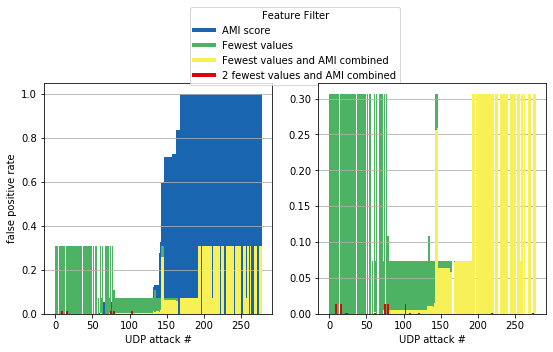

In [56]:
#     reader = csv.reader(f)
#     results = list(reader)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
results = pd.read_csv('results_tcp_AMI.csv')
# results = results.sort_values('fp')

results2 = pd.read_csv('results_tcp_leastvalues.csv')
# results2 = results2.sort_values('fp')

results3 = pd.read_csv('results_tcp_lvplusami.csv')
# results3 = results3.sort_values('fp')

results4 = pd.read_csv('results.csv')
# results4 = results4.sort_values('fp')


data = pd.concat([results['fp'],results2['fp'],results3['fp'],results4['fp']],axis=1,keys=['r1', 'r2', 'r3','r4'])

data = data.sort_values('r1')

x = range(1,254)
y = list(data['r1']/1582358)
yy = list(data['r2']/1582358)
yyy = list(data['r3']/1582358)
yyyy = list(data['r4']/1582358)


fig, (ax, ax2) = plt.subplots(1, 2)
# ax = fig.add_subplot(111)
# ax2 = fig.add_subplot(111)
bar_width = 1

for i in range(len(y)):
    ax.bar(i, y[i], color='#1965B0',width=bar_width,zorder=0)
    ax.bar(i , yy[i], color='#4EB265',width=bar_width,zorder=1)
    ax.bar(i , yyy[i], color='#F7F056',width=bar_width,zorder=2)
    ax.bar(i , yyyy[i], color='#DC050C',width=2*bar_width,zorder=4)
    ax2.bar(i , yy[i], color='#4EB265',width=bar_width,zorder=1)
    ax2.bar(i , yyy[i], color='#F7F056',width=bar_width,zorder=2)
    ax2.bar(i , yyyy[i], color='#DC050C',width=2*bar_width,zorder=4)

    
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#1965B0', lw=4),
                Line2D([0], [0], color='#4EB265', lw=4),
                Line2D([0], [0], color='#F7F056', lw=4),
                Line2D([0], [0], color='#DC050C', lw=4)]


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height - box.height * 0.15])
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width, box.height - box.height * 0.15])


ax.legend(custom_lines, ['AMI score', 'Fewest values', 'Fewest values and AMI combined','2 fewest values and AMI combined'],title="Feature Filter",loc='upper center', bbox_to_anchor=(1.1, 1.35))

# plt.yticks([-0.01])
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.plot(x, y)
# plt.plot(x, yy)
# plt.plot(x, yyy)
# plt.plot(x, yyyy)
# plt.plot(x, yyyyy)
# plt.plot(x, y3)
ax.grid(axis='y', linestyle='-')
ax2.grid(axis='y', linestyle='-')
# plt.grid(axis='x', linestyle='-')
ax.set_xlabel('UDP attack #')
ax2.set_xlabel('UDP attack #')
ax.set_ylabel('false positive rate')

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.savefig('masterthesis/TCP_AMI.eps', format='eps')
plt.show()



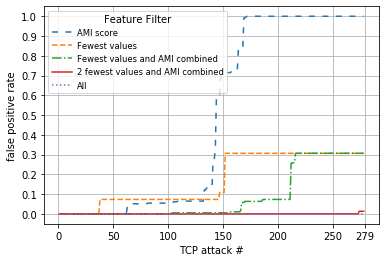

In [133]:
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

results = pd.read_csv('results_tcp_AMI.csv')
results = results.sort_values('fp')

results2 = pd.read_csv('results_tcp_leastvalues.csv')
results2 = results2.sort_values('fp')

results3 = pd.read_csv('results_tcp_lvplusami.csv')
results3 = results3.sort_values('fp')

results4 = pd.read_csv('results.csv')
results4 = results4.sort_values('fp')


x = range(1,279)
y = list(results['fp']/1582358)
yy = list(results2['fp']/1582358)
yyy = list(results3['fp']/1582358)
yyyy = np.zeros(278)
yyyyy = list(results4['fp']/1582358)
# my_xticks = [0, 25, 50, 75,100]
plt.xticks([0,50,100,150,200,250,279])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
plt.plot(x, y, dashes=[4,5], label='AMI score')
plt.plot(x, yy, linestyle='--', label='Fewest values')
plt.plot(x, yyy, linestyle='-.',label='Fewest values and AMI combined')
plt.plot(x, yyyyy, linestyle='-',label='2 fewest values and AMI combined')
plt.plot(x, yyyy, linestyle=':',label='All')
plt.legend(loc=2, prop=fontP, handletextpad=0.5, handlelength = 2.5, title="Feature Filter")
plt.xlabel('TCP attack #')
plt.ylabel('false positive rate')
plt.grid(axis='y', linestyle='-')
plt.grid(axis='x', linestyle='-')
# plt.savefig('masterthesis/AMI_TCP.eps', format='eps')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (279,) and (240,)

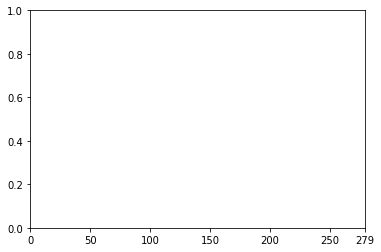

In [132]:
results = pd.read_csv('results_copy.csv')
results = results.sort_values('fp')

x = range(1,280)
y = list(results['fp']/1582358)

# my_xticks = [0, 25, 50, 75,100]
plt.xticks([0,50,100,150,200,250,279])
# plt.yticks([1000,1111111])
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
plt.plot(x, y)
plt.xlabel('TCP attack #')
plt.ylabel('false positive rate')
plt.grid(axis='y', linestyle='-')
plt.grid(axis='x', linestyle='-')
plt.show()
# plt.savefig('masterthesis/AMI_TCP.eps', format='eps')

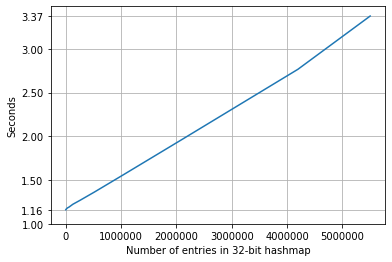

In [5]:
bits = [4096,8192,16384,32768,65536,131072,262144,524288,1048576,2097152,4194304,5500000]
seconds = [1.1607694625854492,1.165313959121704,1.170912504196167,1.1808791160583496,1.192572832107544,1.2230796813964844,1.2687835693359375,1.3642644882202148,1.5622951984405518,1.961808443069458,2.76552152633667,3.3747105598449707]

# 1024,2048
# 1.2046394348144531,1.1685924530029297

plt.xlabel('Number of entries in 32-bit hashmap')
plt.ylabel('Seconds')


x = bits
y = seconds

plt.plot(x,y)
ax = plt.gca()
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_yticks([1,1.16,1.5,2,2.5,3,3.37])
# ax.set_xticks([4000,10000,100000,1000000,5500000])
# ax.set_xticklabels([4000,10000,100000,1000000,5500000])
ax.grid(zorder=0)
plt.savefig('masterthesis/load_speed.eps', format='eps')
plt.show()

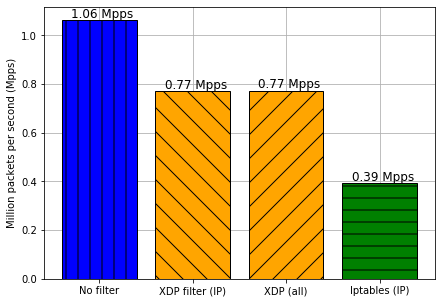

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
patterns = [ "|" , "\\" , "/" , "+" , "-", ".", "*","x", "o", "O" ]
values = [1.06385714285714,0.771428571428572,0.77380952380952,0.393047619047619]
labels = ['No filter', 'XDP filter (IP)', 'XDP (all)', 'Iptables (IP)']
ax = fig.add_subplot(111)
plt.ylabel('Million packets per second (Mpps)')
ax.bar(0, 1.06385714285714, color='blue', edgecolor='black', hatch=patterns[0], zorder=3, label=labels[0])
ax.bar(1, 0.770428571428572, color='orange', edgecolor='black', hatch=patterns[1], zorder=3, label=labels[1])
ax.bar(2, 0.77380952380952, color='orange', edgecolor='black', hatch=patterns[2], zorder=3, label=labels[2])
ax.bar(3, 0.393047619047619, color='green', edgecolor='black', hatch=patterns[4], zorder=3, label=labels[3])
# ax.legend(title="Filter types",handlelength = 5)
bars = ["A", "B", "C", "D"]

for i in range(len(values)):
    ax.text(i-0.3,values[i]+0.01,str(round(values[i],2))+" Mpps", fontsize= 12)

plt.xticks([0,1,2,3], labels)

ax.grid(zorder=0)
# fig = plt.gcf()
fig.set_size_inches(7, 5)
# plt.tight_layout()
plt.savefig('masterthesis/mpps.eps', format='eps')
plt.show()


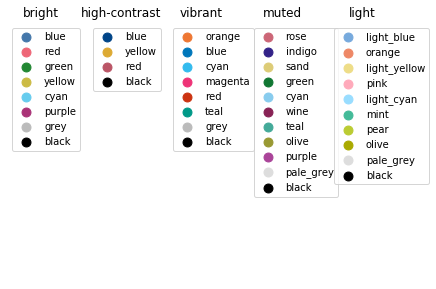

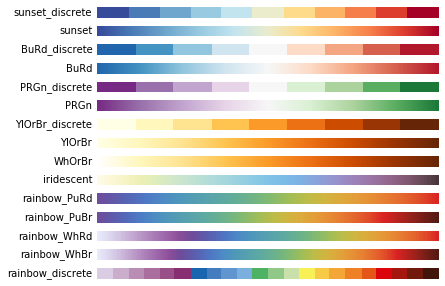

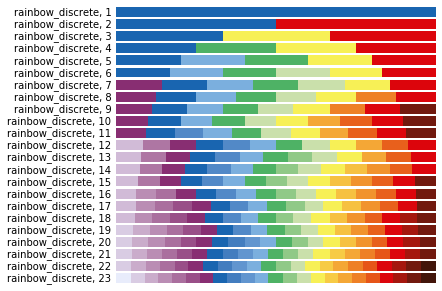

In [27]:
"""
Definition of colour schemes for lines and maps that also work for colour-blind
people. See https://personal.sron.nl/~pault/ for background information and
best usage of the schemes.

Copyright (c) 2019, Paul Tol
All rights reserved.

License:  Standard 3-clause BSD
"""
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, to_rgba_array


def discretemap(colormap, hexclrs):
    """
    Produce a colormap from a list of discrete colors without interpolation.
    """
    clrs = to_rgba_array(hexclrs)
    clrs = np.vstack([clrs[0], clrs, clrs[-1]])
    cdict = {}
    for ki, key in enumerate(('red','green','blue')):
        cdict[key] = [ (i/(len(clrs)-2.), clrs[i, ki], clrs[i+1, ki]) for i in range(len(clrs)-1) ]
    return LinearSegmentedColormap(colormap, cdict)


class TOLcmaps(object):
    """
    Class TOLcmaps definition.
    """
    def __init__(self):
        """
        """
        self.cmap = None
        self.cname = None
        self.namelist = (
            'sunset_discrete', 'sunset', 'BuRd_discrete', 'BuRd',
            'PRGn_discrete', 'PRGn', 'YlOrBr_discrete', 'YlOrBr', 'WhOrBr',
            'iridescent', 'rainbow_PuRd', 'rainbow_PuBr', 'rainbow_WhRd',
            'rainbow_WhBr', 'rainbow_discrete')

        self.funcdict = dict(
            zip(self.namelist,
                (self.__sunset_discrete, self.__sunset, self.__BuRd_discrete,
                self.__BuRd, self.__PRGn_discrete, self.__PRGn,
                self.__YlOrBr_discrete, self.__YlOrBr, self.__WhOrBr,
                self.__iridescent, self.__rainbow_PuRd, self.__rainbow_PuBr,
                self.__rainbow_WhRd, self.__rainbow_WhBr,
                self.__rainbow_discrete)))

    def __sunset_discrete(self):
        """
        Define colormap 'sunset_discrete'.
        """
        clrs = ['#364B9A', '#4A7BB7', '#6EA6CD', '#98CAE1', '#C2E4EF',
                '#EAECCC', '#FEDA8B', '#FDB366', '#F67E4B', '#DD3D2D',
                '#A50026']
        self.cmap = discretemap(self.cname, clrs)
        self.cmap.set_bad('#FFFFFF')

    def __sunset(self):
        """
        Define colormap 'sunset'.
        """
        clrs = ['#364B9A', '#4A7BB7', '#6EA6CD', '#98CAE1', '#C2E4EF',
                '#EAECCC', '#FEDA8B', '#FDB366', '#F67E4B', '#DD3D2D',
                '#A50026']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#FFFFFF')

    def __BuRd_discrete(self):
        """
        Define colormap 'BuRd_discrete'.
        """
        clrs = ['#2166AC', '#4393C3', '#92C5DE', '#D1E5F0', '#F7F7F7',
                '#FDDBC7', '#F4A582', '#D6604D', '#B2182B']
        self.cmap = discretemap(self.cname, clrs)
        self.cmap.set_bad('#FFEE99')

    def __BuRd(self):
        """
        Define colormap 'BuRd'.
        """
        clrs = ['#2166AC', '#4393C3', '#92C5DE', '#D1E5F0', '#F7F7F7',
                '#FDDBC7', '#F4A582', '#D6604D', '#B2182B']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#FFEE99')

    def __PRGn_discrete(self):
        """
        Define colormap 'PRGn_discrete'.
        """
        clrs = ['#762A83', '#9970AB', '#C2A5CF', '#E7D4E8', '#F7F7F7',
                '#D9F0D3', '#ACD39E', '#5AAE61', '#1B7837']
        self.cmap = discretemap(self.cname, clrs)
        self.cmap.set_bad('#FFEE99')

    def __PRGn(self):
        """
        Define colormap 'PRGn'.
        """
        clrs = ['#762A83', '#9970AB', '#C2A5CF', '#E7D4E8', '#F7F7F7',
                '#D9F0D3', '#ACD39E', '#5AAE61', '#1B7837']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#FFEE99')

    def __YlOrBr_discrete(self):
        """
        Define colormap 'YlOrBr_discrete'.
        """
        clrs = ['#FFFFE5', '#FFF7BC', '#FEE391', '#FEC44F', '#FB9A29',
                '#EC7014', '#CC4C02', '#993404', '#662506']
        self.cmap = discretemap(self.cname, clrs)
        self.cmap.set_bad('#888888')

    def __YlOrBr(self):
        """
        Define colormap 'YlOrBr'.
        """
        clrs = ['#FFFFE5', '#FFF7BC', '#FEE391', '#FEC44F', '#FB9A29',
                '#EC7014', '#CC4C02', '#993404', '#662506']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#888888')

    def __WhOrBr(self):
        """
        Define colormap 'WhOrBr'.
        """
        clrs = ['#FFFFFF', '#FFF7BC', '#FEE391', '#FEC44F', '#FB9A29',
                '#EC7014', '#CC4C02', '#993404', '#662506']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#888888')

    def __iridescent(self):
        """
        Define colormap 'iridescent'.
        """
        clrs = ['#FEFBE9', '#FCF7D5', '#F5F3C1', '#EAF0B5', '#DDECBF',
                '#D0E7CA', '#C2E3D2', '#B5DDD8', '#A8D8DC', '#9BD2E1',
                '#8DCBE4', '#81C4E7', '#7BBCE7', '#7EB2E4', '#88A5DD',
                '#9398D2', '#9B8AC4', '#9D7DB2', '#9A709E', '#906388',
                '#805770', '#684957', '#46353A']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#999999')

    def __rainbow_PuRd(self):
        """
        Define colormap 'rainbow_PuRd'.
        """
        clrs = ['#6F4C9B', '#6059A9', '#5568B8', '#4E79C5', '#4D8AC6',
                '#4E96BC', '#549EB3', '#59A5A9', '#60AB9E', '#69B190',
                '#77B77D', '#8CBC68', '#A6BE54', '#BEBC48', '#D1B541',
                '#DDAA3C', '#E49C39', '#E78C35', '#E67932', '#E4632D',
                '#DF4828', '#DA2222']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#FFFFFF')

    def __rainbow_PuBr(self):
        """
        Define colormap 'rainbow_PuBr'.
        """
        clrs = ['#6F4C9B', '#6059A9', '#5568B8', '#4E79C5', '#4D8AC6',
                '#4E96BC', '#549EB3', '#59A5A9', '#60AB9E', '#69B190',
                '#77B77D', '#8CBC68', '#A6BE54', '#BEBC48', '#D1B541',
                '#DDAA3C', '#E49C39', '#E78C35', '#E67932', '#E4632D',
                '#DF4828', '#DA2222', '#B8221E', '#95211B', '#721E17',
                '#521A13']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#FFFFFF')

    def __rainbow_WhRd(self):
        """
        Define colormap 'rainbow_WhRd'.
        """
        clrs = ['#E8ECFB', '#DDD8EF', '#D1C1E1', '#C3A8D1', '#B58FC2',
                '#A778B4', '#9B62A7', '#8C4E99', '#6F4C9B', '#6059A9',
                '#5568B8', '#4E79C5', '#4D8AC6', '#4E96BC', '#549EB3',
                '#59A5A9', '#60AB9E', '#69B190', '#77B77D', '#8CBC68',
                '#A6BE54', '#BEBC48', '#D1B541', '#DDAA3C', '#E49C39',
                '#E78C35', '#E67932', '#E4632D', '#DF4828', '#DA2222']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#666666')

    def __rainbow_WhBr(self):
        """
        Define colormap 'rainbow_WhBr'.
        """
        clrs = ['#E8ECFB', '#DDD8EF', '#D1C1E1', '#C3A8D1', '#B58FC2',
                '#A778B4', '#9B62A7', '#8C4E99', '#6F4C9B', '#6059A9',
                '#5568B8', '#4E79C5', '#4D8AC6', '#4E96BC', '#549EB3',
                '#59A5A9', '#60AB9E', '#69B190', '#77B77D', '#8CBC68',
                '#A6BE54', '#BEBC48', '#D1B541', '#DDAA3C', '#E49C39',
                '#E78C35', '#E67932', '#E4632D', '#DF4828', '#DA2222',
                '#B8221E', '#95211B', '#721E17', '#521A13']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#666666')

    def __rainbow_discrete(self, lut=None):
        """
        Define colormap 'rainbow_discrete'.
        """
        clrs = ['#E8ECFB', '#D9CCE3', '#D1BBD7', '#CAACCB', '#BA8DB4',
                '#AE76A3', '#AA6F9E', '#994F88', '#882E72', '#1965B0',
                '#437DBF', '#5289C7', '#6195CF', '#7BAFDE', '#4EB265',
                '#90C987', '#CAE0AB', '#F7F056', '#F7CB45', '#F6C141',
                '#F4A736', '#F1932D', '#EE8026', '#E8601C', '#E65518',
                '#DC050C', '#A5170E', '#72190E', '#42150A']
        indexes = [[9], [9, 25], [9, 17, 25], [9, 14, 17, 25], [9, 13, 14, 17,
                25], [9, 13, 14, 16, 17, 25], [8, 9, 13, 14, 16, 17, 25], [8,
                9, 13, 14, 16, 17, 22, 25], [8, 9, 13, 14, 16, 17, 22, 25, 27],
                [8, 9, 13, 14, 16, 17, 20, 23, 25, 27], [8, 9, 11, 13, 14, 16,
                17, 20, 23, 25, 27], [2, 5, 8, 9, 11, 13, 14, 16, 17, 20, 23,
                25], [2, 5, 8, 9, 11, 13, 14, 15, 16, 17, 20, 23, 25], [2, 5,
                8, 9, 11, 13, 14, 15, 16, 17, 19, 21, 23, 25], [2, 5, 8, 9, 11,
                13, 14, 15, 16, 17, 19, 21, 23, 25, 27], [2, 4, 6, 8, 9, 11,
                13, 14, 15, 16, 17, 19, 21, 23, 25, 27], [2, 4, 6, 7, 8, 9, 11,
                13, 14, 15, 16, 17, 19, 21, 23, 25, 27], [2, 4, 6, 7, 8, 9, 11,
                13, 14, 15, 16, 17, 19, 21, 23, 25, 26, 27], [1, 3, 4, 6, 7, 8,
                9, 11, 13, 14, 15, 16, 17, 19, 21, 23, 25, 26, 27], [1, 3, 4,
                6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 23, 25, 26,
                27], [1, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20,
                22, 24, 25, 26, 27], [1, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15,
                16, 17, 18, 20, 22, 24, 25, 26, 27, 28], [0, 1, 3, 4, 6, 7, 8,
                9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 22, 24, 25, 26, 27, 28]]
        if lut == None or lut < 1 or lut > 23:
            lut = 22
        self.cmap = discretemap(self.cname, [ clrs[i] for i in indexes[lut-1] ])
        if lut == 23:
            self.cmap.set_bad('#777777')
        else:
            self.cmap.set_bad('#FFFFFF')

    def show(self):
        """
        List names of defined colormaps.
        """
        print(' '.join(repr(n) for n in self.namelist))

    def get(self, cname='rainbow_PuRd', lut=None):
        """
        Return requested colormap, default is 'rainbow_PuRd'.
        """
        self.cname = cname
        if cname == 'rainbow_discrete':
            self.__rainbow_discrete(lut)
        else:
            self.funcdict[cname]()
        return self.cmap


def tol_cmap(colormap=None, lut=None):
    """
    Continuous and discrete color sets for ordered data.
    
    Return a matplotlib colormap.
    Parameter lut is ignored for all colormaps except 'rainbow_discrete'.
    """
    obj = TOLcmaps()
    if colormap == None:
        return obj.namelist
    if colormap not in obj.namelist:
        colormap = 'rainbow_PuRd'
        print('*** Warning: requested colormap not defined,',
              'known colormaps are {}.'.format(obj.namelist),
              'Using {}.'.format(colormap))
    return obj.get(colormap, lut)


def tol_cset(colorset=None):
    """
    Discrete color sets for qualitative data.

    Define a namedtuple instance with the colors.
    Examples for: cset = tol_cset(<scheme>)
      - cset.red and cset[1] give the same color (in default 'bright' colorset)
      - cset._fields gives a tuple with all color names
      - list(cset) gives a list with all colors
    """
    from collections import namedtuple
    
    namelist = ('bright', 'high-contrast', 'vibrant', 'muted', 'light')
    if colorset == None:
        return namelist
    if colorset not in namelist:
        colorset = 'bright'
        print('*** Warning: requested colorset not defined,',
              'known colorsets are {}.'.format(namelist),
              'Using {}.'.format(colorset)) 

    if colorset == 'bright':
        cset = namedtuple('Bcset',
                    'blue red green yellow cyan purple grey black')
        return cset('#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE',
                    '#AA3377', '#BBBBBB', '#000000')
    
    if colorset == 'high-contrast':
        cset = namedtuple('Hcset',
                    'blue yellow red black')
        return cset('#004488', '#DDAA33', '#BB5566', '#000000')

    if colorset == 'vibrant':
        cset = namedtuple('Vcset',
                    'orange blue cyan magenta red teal grey black')
        return cset('#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311',
                    '#009988', '#BBBBBB', '#000000')

    if colorset == 'muted':
        cset = namedtuple('Mcset',
                    'rose indigo sand green cyan wine teal olive purple pale_grey black')
        return cset('#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
                    '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
                    '#000000')

    if colorset == 'light':
        cset = namedtuple('Lcset',
                    'light_blue orange light_yellow pink light_cyan mint pear olive pale_grey black')
        return cset('#77AADD', '#EE8866', '#EEDD88', '#FFAABB', '#99DDFF',
                    '#44BB99', '#BBCC33', '#AAAA00', '#DDDDDD', '#000000')


def main():

    from matplotlib import pyplot as plt

    # Change default colorset (for lines) and colormap (for maps).
#    plt.rc('axes', prop_cycle=plt.cycler('color', list(tol_cset('bright'))))
#    plt.cm.register_cmap('rainbow_PuRd', tol_cmap('rainbow_PuRd'))
#    plt.rc('image', cmap='rainbow_PuRd')

    # Show colorsets tol_cset(<scheme>).
    schemes = tol_cset()
    fig, axes = plt.subplots(ncols=len(schemes))
    fig.subplots_adjust(top=0.92, bottom=0.02, left=0.02, right=0.92)
    for ax, scheme in zip(axes, schemes):
        cset = tol_cset(scheme)
        names = cset._fields
        colors = list(cset)
        for name, color in zip(names, colors):
            ax.scatter([], [], c=color, s=80, label=name)
        ax.set_axis_off()
        ax.legend(loc=2)
        ax.set_title(scheme)
    plt.show()

    # Show colormaps tol_cmap(<scheme>). 
    schemes = tol_cmap()
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    fig, axes = plt.subplots(nrows=len(schemes))
    fig.subplots_adjust(top=0.98, bottom=0.02, left=0.2, right=0.99)
    for ax, scheme in zip(axes, schemes):
        pos = list(ax.get_position().bounds)
        ax.set_axis_off()
        ax.imshow(gradient, aspect=4, cmap=tol_cmap(scheme))
        fig.text(pos[0] - 0.01, pos[1] + pos[3]/2., scheme, va='center', ha='right', fontsize=10)
    plt.show()

    # Show colormaps tol_cmap('rainbow_discrete', <lut>). 
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    fig, axes = plt.subplots(nrows=23)
    fig.subplots_adjust(top=0.98, bottom=0.02, left=0.25, right=0.99)
    for lut, ax in enumerate(axes, start=1):
        pos = list(ax.get_position().bounds)
        ax.set_axis_off()
        ax.imshow(gradient, aspect=4, cmap=tol_cmap('rainbow_discrete', lut))
        fig.text(pos[0] - 0.01, pos[1] + pos[3]/2., 'rainbow_discrete, ' + str(lut), va='center', ha='right', fontsize=10)
    plt.show()


if __name__ == '__main__':
    main()